# Estudo sobre Previsão de Vendas Utilizando Séries Temporais

### 1. Definição

Uma série temporal é uma sequência de dados ou observações coletadas e **ordenadas no tempo**. Cada dado ou ponto da série representa uma medição ou evento associado a um momento específico, podendo ser um instante ou um intervalo de tempo.

### 2. Características principais de uma série temporal
1. **Ordem temporal:** Os dados estão ordenados cronologicamente, e essa ordem importa para a análise.  

2. **Dependência temporal:** Os valores futuros podem depender dos valores passados, ou seja, há uma relação entre os pontos da série.  

3. **Frequência:** As observações podem ser coletadas em intervalos regulares (diários, mensais, anuais, etc.) ou irregulares.  

### 3. Classificação quanto ao número de variáveis independentes  

- *Série Temporal Univariada*  
  Contém apenas uma variável dependente, ou seja, uma única sequência de observações ao longo do tempo.  
  
  Exemplos:  
  Previsão de vendas semanais de uma loja.  
  Previsão da temperatura diária de uma cidade.

- *Série Temporal Multivariada*  
  Contém múltiplas variáveis, incluindo uma variável dependente e outras variáveis independentes que podem influenciá-la.  

  Exemplo:  
  Previsão de vendas semanais considerando fatores como temperatura, preço do combustível e taxa de desemprego.  
  Previsão de geração de energia considerando dados climáticos como vento, radiação solar e precipitação.



### 4. Componentes de um série temporal  

- **Tendência (Trend)**:
Representa a direção geral da série ao longo do tempo (crescimento, decrescimento ou estabilidade). Refere-se ao movimento de longo prazo ou direção geral da série temporal.  

- **Sazonalidade (Seasonality)**:
Padrões cíclicos que se repetem em **intervalos regulares**, como variações anuais ou mensais.  

- **Ciclos (Cycles)**:
Flutuações mais longas e irregulares, geralmente associadas a eventos econômicos ou sociais.  

- **Ruído (Noise)**:
Variações aleatórias ou imprevisíveis que não seguem nenhum padrão identificável.

<br>

#### 4.1. Representação Matemática de uma série temporal
A representação matemática de uma série temporal pode ser expressa de maneira geral por duas formas principais, dependendo da relação entre os componentes: **aditiva** e **multiplicativa**.  

<br>

No modelo aditivo, a série temporal ($Y_t$) é a soma de suas componentes:

$$
Yt= T_t + S_t + C_t +E_t​​
$$

-   $T_t$ ​: **Tendência** - Representa o movimento de longo prazo.

-   $S_t$​: **Sazonalidade** - Reflete padrões regulares e periódicos.

-   $C_t$​: **Ciclo** - Oscilações de médio a longo prazo sem periodicidade fixa.

-   $E_t$​: **Ruído** - Componentes aleatórios e imprevisíveis.

<br>

<br>

No modelo multiplicativo, a série temporal é o produto de suas componentes:

$$
Y_t=T_t \times S_tx \times C_t \times E_t
$$

Ou, alternativamente, em uma forma log-transformada para linearizar o modelo:

$$
ln(Y_t)=ln(T_t)+ln(S_t)+ln(C_t)+ln(E_t)
$$

-   $T_t$ ​: **Tendência** - Representa o movimento de longo prazo.

-   $S_t$​: **Sazonalidade** - Reflete padrões regulares e periódicos.

-   $C_t$​: **Ciclo** - Oscilações de médio a longo prazo sem periodicidade fixa.

-   $E_t$​: **Ruído** - Componentes aleatórios e imprevisíveis.

<br>

#### Escolha do Modelo

-   **Aditivo**: Usado quando a amplitude dos componentes sazonais e cíclicos não muda ao longo do tempo.

-   **Multiplicativo**: Usado quando a amplitude dos componentes sazonais e cíclicos aumenta ou diminui proporcionalmente à tendência.

<br>

#### Um guia para modelos de séries temporais

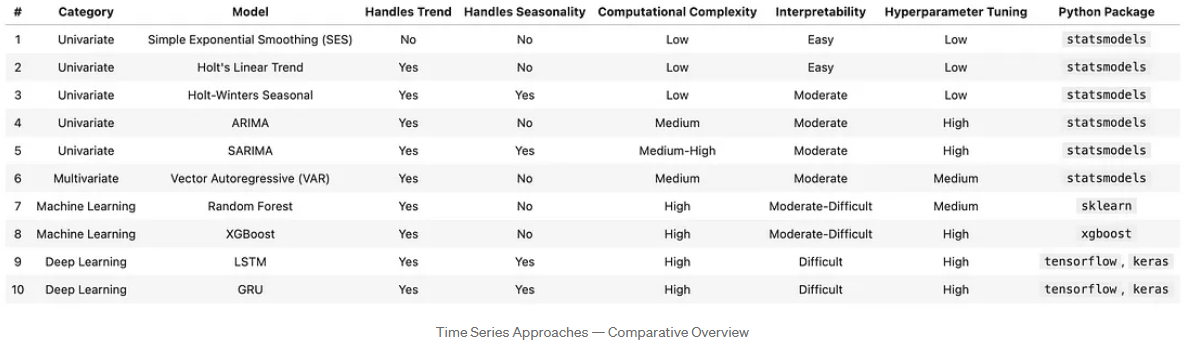

<br>

---

## Aplicação prática

#### Instalar as bibliotecas necessárias

In [ ]:
!pip install kagglehub
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.8 MB/s eta 0:00:00


#### Carrregar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from scipy.stats import skew, kurtosis

from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # Modelo de Suavização Exponencial Simples
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Modelo Holt-Winters

from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error

import kagglehub

from google.colab import drive

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Carregar o dataset

In [ ]:
# Mapeia Google Drive
drive.mount('/content/drive')

# Cria diretório no Google Colab para armazenar a Kaggle Key
! mkdir ~/.kaggle

# Copia Kaggle Key do Google Drive para o Colab
!cp /content/drive/MyDrive/Projetos/Kaggle/kaggle.json ~/.kaggle/kaggle.json

# Faz o download da base de dados diretamente do Kaggle
! kaggle competitions download -c walmart-recruiting-store-sales-forecasting
print('Download finalizado')

# Descompacta o arquivo zip com o dataset
! unzip walmart-recruiting-store-sales-forecasting.zip > unzip_log.txt 2>&1
! rm -rf walmart-recruiting-store-sales-forecasting.zip
print('walmart-recruiting-store-sales-forecasting.zip descompactado')

# Descompacta os arquivos individuais
! unzip features.csv.zip > unzip_log.txt 2>&1
! rm -rf features.csv.zip
print('Arquivo features.zip descompactado')

! unzip train.csv.zip > unzip_log.txt 2>&1
! rm -rf train.csv.zip
print('Arquivo train.zip descompactado')

! unzip test.csv.zip > unzip_log.txt 2>&1
! rm -rf test.csv.zip
print('Arquivo test.zip descompactado')

! unzip sampleSubmission.csv.zip > unzip_log.txt 2>&1
! rm -rf sampleSubmission.csv.zip
print('Arquivo sampleSubmission.zip descompactado')

Mounted at /content/drive
 37% 1.00M/2.70M [00:00<00:00, 5.81MB/s]
100% 2.70M/2.70M [00:00<00:00, 14.8MB/s]
Download finalizado
walmart-recruiting-store-sales-forecasting.zip descompactado
Arquivo features.zip descompactado
Arquivo train.zip descompactado
Arquivo test.zip descompactado
Arquivo sampleSubmission.zip descompactado


#### Carregar cada um dos arquivos

In [ ]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sampleSubmission.csv')

#### Exploração inicial dos datasets

#####**Dataset Features**

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [ ]:
dimensao_features = features.shape

print(f'Número de observações: {dimensao_features[0]}')
print(f'Número de variáveis: {dimensao_features[1]}')

Número de observações: 8190
Número de variáveis: 12


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
# Número de lojas
lojas = features['Store'].nunique()

# Número de dias observados
dias = features['Date'].nunique()

# Menor data
data_inicial = features['Date'].min()

# Maior data
data_final = features['Date'].max()

print(f'Número de lojas: {lojas}')
print(f'Número de dias observador: {dias}')
print(f'Data inicial: {data_inicial}')
print(f'Data final: {data_final}')

Número de lojas: 45
Número de dias observador: 182
Data inicial: 2010-02-05
Data final: 2013-07-26


In [ ]:
# Número de valores faltantes
falta_features = features.isna().sum()
print(falta_features)

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [ ]:
# % de valores faltantes com duas casas decimais
falta_features_percent = round(100 * falta_features / len(features), 2)
print(falta_features_percent)

Store            0.00
Date             0.00
Temperature      0.00
Fuel_Price       0.00
MarkDown1       50.77
MarkDown2       64.33
MarkDown3       55.89
MarkDown4       57.70
MarkDown5       50.55
CPI              7.14
Unemployment     7.14
IsHoliday        0.00
dtype: float64


In [ ]:
# Quais são as datas com valores faltantes em CPI ?
datas = features['Date'][features['CPI'].isna()].unique()

# Ordenar as datas
datas.sort()

print(f'Datas com valores faltantes: {datas}')

Datas com valores faltantes: ['2013-05-03' '2013-05-10' '2013-05-17' '2013-05-24' '2013-05-31'
 '2013-06-07' '2013-06-14' '2013-06-21' '2013-06-28' '2013-07-05'
 '2013-07-12' '2013-07-19' '2013-07-26']


In [ ]:
# Quais são as datas com valores faltantes em Unemployment ?
datas = features['Date'][features['Unemployment'].isna()].unique()

# Ordenar as datas
datas.sort()

print(f'Datas com valores faltantes: {datas}')

Datas com valores faltantes: ['2013-05-03' '2013-05-10' '2013-05-17' '2013-05-24' '2013-05-31'
 '2013-06-07' '2013-06-14' '2013-06-21' '2013-06-28' '2013-07-05'
 '2013-07-12' '2013-07-19' '2013-07-26']


---

<br>

##### **Dataset Stores**

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [ ]:
dimensao_stores = stores.shape

print(f'Número de observações: {dimensao_stores[0]}')
print(f'Número de variáveis: {dimensao_stores[1]}')

Número de observações: 45
Número de variáveis: 3


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
# Número de lojas
lojas = stores['Store'].nunique()

#Tipos de loja
tipos = stores['Type'].unique()

# Número de cidades
cidades = stores['Size'].nunique()

print(f'Número de lojas: {lojas}')
print(f'Tipos de loja: {tipos}')
print(f'Número de cidades: {cidades}')

Número de lojas: 45
Tipos de loja: ['A' 'B' 'C']
Número de cidades: 40


In [ ]:
# Valores faltantes
stores_faltantes = stores.isna().sum()
print(stores_faltantes)

Store    0
Type     0
Size     0
dtype: int64


---

<br>

##### **Dataset Train**

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [ ]:
dimensao_train = train.shape

print(f'Número de observações: {dimensao_train[0]}')
print(f'Número de variáveis: {dimensao_train[1]}')

Número de observações: 421570
Número de variáveis: 5


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
# Número de departamentos por loja
for loja in train['Store'].unique():
  print(f'\nLoja: {loja}')
  departamento = train['Dept'][train['Store'] == loja].nunique()
  print(f'Número de departamentos: {departamento}')



Loja: 1
Número de departamentos: 77

Loja: 2
Número de departamentos: 78

Loja: 3
Número de departamentos: 72

Loja: 4
Número de departamentos: 78

Loja: 5
Número de departamentos: 72

Loja: 6
Número de departamentos: 77

Loja: 7
Número de departamentos: 76

Loja: 8
Número de departamentos: 76

Loja: 9
Número de departamentos: 73

Loja: 10
Número de departamentos: 77

Loja: 11
Número de departamentos: 78

Loja: 12
Número de departamentos: 75

Loja: 13
Número de departamentos: 79

Loja: 14
Número de departamentos: 77

Loja: 15
Número de departamentos: 79

Loja: 16
Número de departamentos: 76

Loja: 17
Número de departamentos: 76

Loja: 18
Número de departamentos: 78

Loja: 19
Número de departamentos: 79

Loja: 20
Número de departamentos: 78

Loja: 21
Número de departamentos: 77

Loja: 22
Número de departamentos: 76

Loja: 23
Número de departamentos: 77

Loja: 24
Número de departamentos: 77

Loja: 25
Número de departamentos: 77

Loja: 26
Número de departamentos: 76

Loja: 27
Número de d

In [ ]:
# Número de lojas
lojas = train['Store'].nunique()

# Número de dias observados
dias = train['Date'].nunique()

# Menor data
data_inicial = train['Date'].min()

# Maior data
data_final = train['Date'].max()

print(f'Número de lojas: {lojas}')
print(f'Número de dias observador: {dias}')
print(f'Data inicial: {data_inicial}')
print(f'Data final: {data_final}')

Número de lojas: 45
Número de dias observador: 143
Data inicial: 2010-02-05
Data final: 2012-10-26


In [ ]:
# Valores faltantes
train_faltantes = train.isna().sum()
print(train_faltantes)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


---

<br>

##### **Dataset Test**

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
test.tail()

,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


In [ ]:
dimensao_test = test.shape

print(f'Número de observações: {dimensao_test[0]}')
print(f'Número de variáveis: {dimensao_test[1]}')

Número de observações: 115064
Número de variáveis: 4


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
# Número de departamentos por loja
for loja in test['Store'].unique():
  print(f'\nLoja: {loja}')
  departamento = test['Dept'][test['Store'] == loja].nunique()
  print(f'Número de departamentos: {departamento}')


Loja: 1
Número de departamentos: 74

Loja: 2
Número de departamentos: 75

Loja: 3
Número de departamentos: 67

Loja: 4
Número de departamentos: 75

Loja: 5
Número de departamentos: 70

Loja: 6
Número de departamentos: 74

Loja: 7
Número de departamentos: 72

Loja: 8
Número de departamentos: 73

Loja: 9
Número de departamentos: 69

Loja: 10
Número de departamentos: 75

Loja: 11
Número de departamentos: 73

Loja: 12
Número de departamentos: 71

Loja: 13
Número de departamentos: 75

Loja: 14
Número de departamentos: 74

Loja: 15
Número de departamentos: 73

Loja: 16
Número de departamentos: 73

Loja: 17
Número de departamentos: 73

Loja: 18
Número de departamentos: 75

Loja: 19
Número de departamentos: 74

Loja: 20
Número de departamentos: 76

Loja: 21
Número de departamentos: 70

Loja: 22
Número de departamentos: 70

Loja: 23
Número de departamentos: 73

Loja: 24
Número de departamentos: 75

Loja: 25
Número de departamentos: 73

Loja: 26
Número de departamentos: 72

Loja: 27
Número de d

In [ ]:
# Número de lojas
lojas = test['Store'].nunique()

# Número de dias observados
dias = test['Date'].nunique()

# Menor data
data_inicial = test['Date'].min()

# Maior data
data_final = test['Date'].max()

print(f'Número de lojas: {lojas}')
print(f'Número de dias observador: {dias}')
print(f'Data inicial: {data_inicial}')
print(f'Data final: {data_final}')

Número de lojas: 45
Número de dias observador: 39
Data inicial: 2012-11-02
Data final: 2013-07-26


In [ ]:
# Valores faltantes
test_faltantes = test.isna().sum()
print(test_faltantes)

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


---

<br>

##### **Resumo dos datasets**  
- Dataset *train*  
  - Possui 421570 observações divididas em 5 variáveis.
  - As observações foram coletadas ao longo de 143 dias, de 2010-02-05 a 2012-10-26.
  - Os dados foram obtidos a partir de 45 lojas que são especificadas por números sequenciais de 1 a 45.
  - Cada loja está dividida em departamentos, que pode variar de 63 a 79.
  - A cada tupla loja - departamento - data é atribuído o total de vendas semanais em US$.  
  - Este dataset não possui observações em branco.  

- Dataset *test*  
  - Possui 115064 observações divididas em 4 variáveis.
  - As observações foram coletadas ao longo de 39 dias, de 2012-11-02 a 2013-07-26. Ou seja, é a continuação do dataset train.  
  - Os dados foram obtidos a partir das mesma 45 lojas e das mesmas seções presentes no dataset train.
  - O dataset também não possui valores em branco.
  - A principal diferença entre os datasets train e test é que o primeiro possui a variável Weekly_Sales, já o último não. Isto deve-se ao fato de que a base foi utilizada em um concurso no Kaggle onde o objetivo principal era estimar as vendas semanais do dataset test, a partir dos dados de treinamento do dataset train.  

- Dataset *features*  
  - Possui até 8190 observações divididas em 11 variáveis.  
  - As observações foram coletadas ao longo de 182 dias, de 2010-02-05 a 2013-07-26.  
  - Foram observados dados das mesmas 45 lojas presentes nos datasets train e test, porém sem levar em conta a divisão por departamentos.  
  - O dataset possui diversas observações em branco, com os seguintes percentuais de valores faltantes:
    - MarkDown1: 50,77%  
    - MarkDown2: 64,33%  
    - MarkDown3: 55,89%  
    - MarkDown4: 57,70%
    - MarkDown5: 50,55%
    - CPI: 7,14%
    - Unemployment: 7,14%  
  - As datas com valores faltantes são as mesmas para as variáveis CPI e Unemployment. Importante destacar que o período onde os dados estão ausentes vai de 03-05-2013 a 2013-07-26. Isto poderá ocasionar problemas ao utilizarmos o dataset test para a previsão das vendas.
  - O CPI ou Consumer Price Index é um índice de inflação utilizado nos EUA, semelhante ao IPCA brasileiro.
  - O índice de Unemployment (Taxa de Desemprego) nos Estados Unidos mede a porcentagem de pessoas da força de trabalho que estão desempregadas e ativamente procurando por emprego.  
  - Por se tratarem de índices oficiais e disponíveis na Internet, é possível buscar os valores faltantes completando o dataset onde necessário.  
  - Tendo em vista que as variáveis MarkDown 1 a 5 possuem mais de 50% de valores faltantes, optei por removê-las do dataset. A utilização de técnicas de imputação geraria erros de precisão, podendo comprometer a qualidade dos dados.  

- Dataset *stores*
  - Possui 45 observações divididas em 3 variáveis.  
  - Não possui valores em branco.  

<br>

---

### OBSERVAÇÃO  

Neste estudo utilizarei modelos destinados tanto a séries temporais univariadas quanto multivariadas.  
Para as séries univariadas farei uso apenas do dataset *train* onde manterei colunas *Date* e *Weekly_Sales*. Feito isso, farei estudos com os modelos ARIMA, Suavização Exponencial Simples e Holt-Winters.
Já para as séries multivariadas consolidarei os datasets *features*, *stores* e *train*. Aqui realizarei estudos com os modelos VAR, Random Forest, XGBoost, LSTM e GRU.  

---






<br>

### Série Temporal Univariada  


#### Adequação do dataset train

In [ ]:
train_modificado = train[['Date', 'Weekly_Sales']]
train_modificado.head()

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [ ]:
# Totalizar as vendas por data criando um dataframe com Date e Weekly_Sales, transformando Date em datetime
train_modificado = train_modificado.groupby('Date').sum().reset_index()
train_modificado['Date'] = pd.to_datetime(train_modificado['Date'])
train_modificado.head()

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [ ]:
train_modificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


#### Análise Exploratória de Dados  

##### Análise numérica

In [ ]:
# Verifica medidas resumo com até 2 casas decimais
var_numericas = ['Weekly_Sales']

results = pd.DataFrame({
    'Assimetria': train_modificado[var_numericas].apply(skew),
    'Curtose': train_modificado[var_numericas].apply(kurtosis),
    'Média': train_modificado[var_numericas].mean().round(2),
    'Mediana': train_modificado[var_numericas].median().round(2),
    'Variância': train_modificado[var_numericas].var().round(2),
    'Desvio Padrão': train_modificado[var_numericas].std().round(2),
    'Mínimo': train_modificado[var_numericas].min().round(2),
    'Máximo': train_modificado[var_numericas].max().round(2),
    'Q1': train_modificado[var_numericas].quantile(0.25).round(2),
    'Q3': train_modificado[var_numericas].quantile(0.75).round(2),

})

results

,Assimetria,Curtose,Média,Mediana,Variância,Desvio Padrão,Mínimo,Máximo,Q1,Q3
Weekly_Sales,3.632019,17.014168,47113419.49,46243899.58,2.963938e+13,5444206.2,39599852.99,80931415.6,44880587.54,47792024.64


##### Análise gráfica

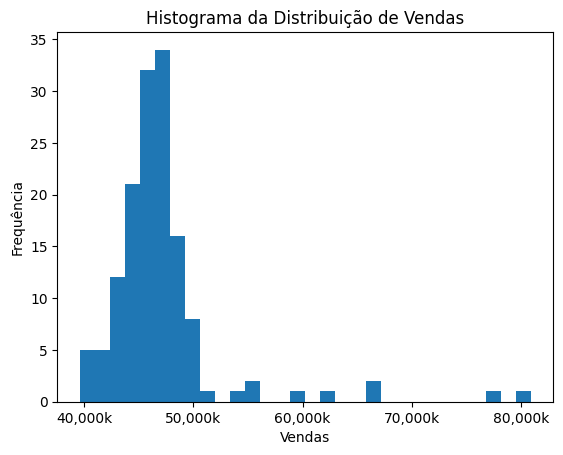

In [ ]:
plt.hist(train_modificado['Weekly_Sales'], bins=30)
plt.title('Histograma da Distribuição de Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
ax = plt.gca()  # Obter o objeto do eixo atual
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))  # Dividir por 1000 e adicionar 'k'
plt.show()

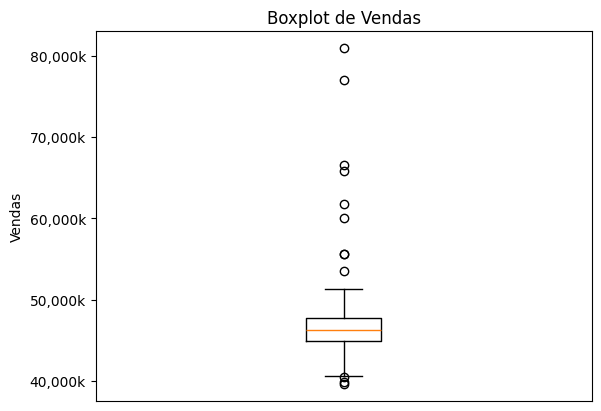

In [ ]:
plt.boxplot(train_modificado['Weekly_Sales'])
plt.title('Boxplot de Vendas')
plt.ylabel('Vendas')
ax = plt.gca()  # Obter o objeto do eixo atual
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))  # Dividir por 1000 e adicionar 'k'
plt.gca().set_xticks([]) # Remover o tick do eixo x
plt.show()

In [ ]:
# Set 'Date' column as index before checking for frequency:
#train_modificado = train_modificado.set_index('Date')

'''
Monotonic Increasing Time Index
What it means ?
The dates in the index should be in strictly increasing order without any overlapping or reversal. This ensures that the time series progresses logically from earlier to later timestamps.

Why it's important ?
A non-monotonic index (e.g., with shuffled or duplicate timestamps) can cause issues during data analysis, visualizations, or model training.
Many time series algorithms assume a sequential order of data.

This checks whether the time index is sorted in increasing order. A True result confirms that the index is properly ordered.
'''
print(train_modificado.index.is_monotonic_increasing)


# ---------------------------------------------

'''
2. Frequency of the Time Series
What it means ?
The frequency (freq) indicates the uniform spacing between timestamps (e.g., daily, hourly, or monthly intervals).

Why it's important ?
Consistent frequency is essential for many time series analysis and forecasting techniques.
Missing or irregular timestamps (e.g., gaps or mixed intervals) can introduce biases or errors.
Knowing the frequency helps select appropriate preprocessing steps like resampling or imputing missing values.

This checks the frequency of the time series (e.g., 'D' for daily, 'H' for hourly).
If freq is None, it means the time index is irregular, and the data may require resampling or interpolation to enforce regularity.
'''
#teste = pd.to_datetime(train_modificado['Date']) # Assuming 'Date' is a column name
#train_mod = train_modificado.set_index('Date')
#teste = train_mod.index.freq
#print(teste)

# Apagar o objeto teste
#del(train_mod)
3del(teste)


'''
Actions Based on Results
If is_monotonic_increasing is False:

Sort the time index:
  df = df.sort_index()

If freq is None:
  Resample or interpolate the data to enforce regularity:
    df = df.resample('D').mean()  # Resample to daily frequency and fill gaps.
    df = df.resample('W-SUN').mean() # Semanal weekly, começando no domingo.
    df = df.resample('M').mean()  # Resample to monthly frequency.
    df = df.resample('Q').mean()  # Resample to quarterly frequency
    df.interpolate(method='linear', inplace=True)  # Fill missing values.
'''

True
None


"\nActions Based on Results\nIf is_monotonic_increasing is False:\n\nSort the time index:\n  df = df.sort_index()\n\nIf freq is None:\n  Resample or interpolate the data to enforce regularity:\n    df = df.resample('D').mean()  # Resample to daily frequency and fill gaps.\n    df = df.resample('W-SUN').mean() # Semanal weekly, começando no domingo.\n    df = df.resample('M').mean()  # Resample to monthly frequency.\n    df = df.resample('Q').mean()  # Resample to quarterly frequency\n    df.interpolate(method='linear', inplace=True)  # Fill missing values.\n"

In [ ]:
#train_modificado = train_modificado.resample('W-SUN').mean()
#train_modificado.interpolate(method='linear', inplace=True)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

##### Gráfico da série temporal

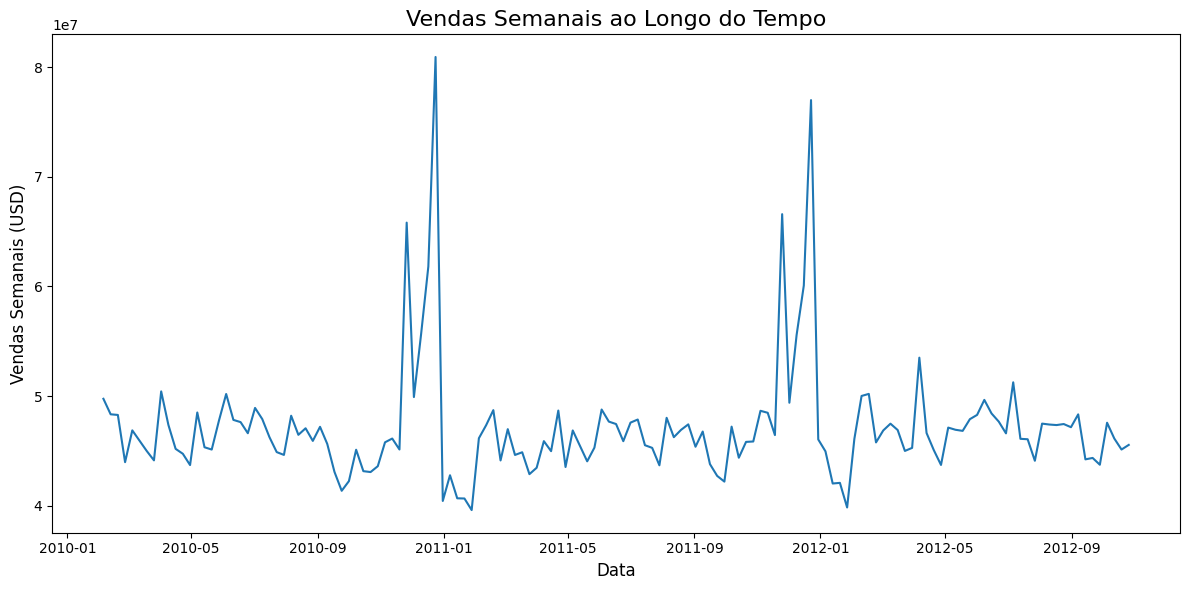

In [ ]:
# Plotando a série temporal
plt.figure(figsize=(12, 6))
plt.plot(train_modificado['Date'], train_modificado['Weekly_Sales'])
plt.title('Vendas Semanais ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Vendas Semanais (USD)', fontsize=12)
plt.tight_layout()
plt.show()

##### Decomposição da Série Temporal

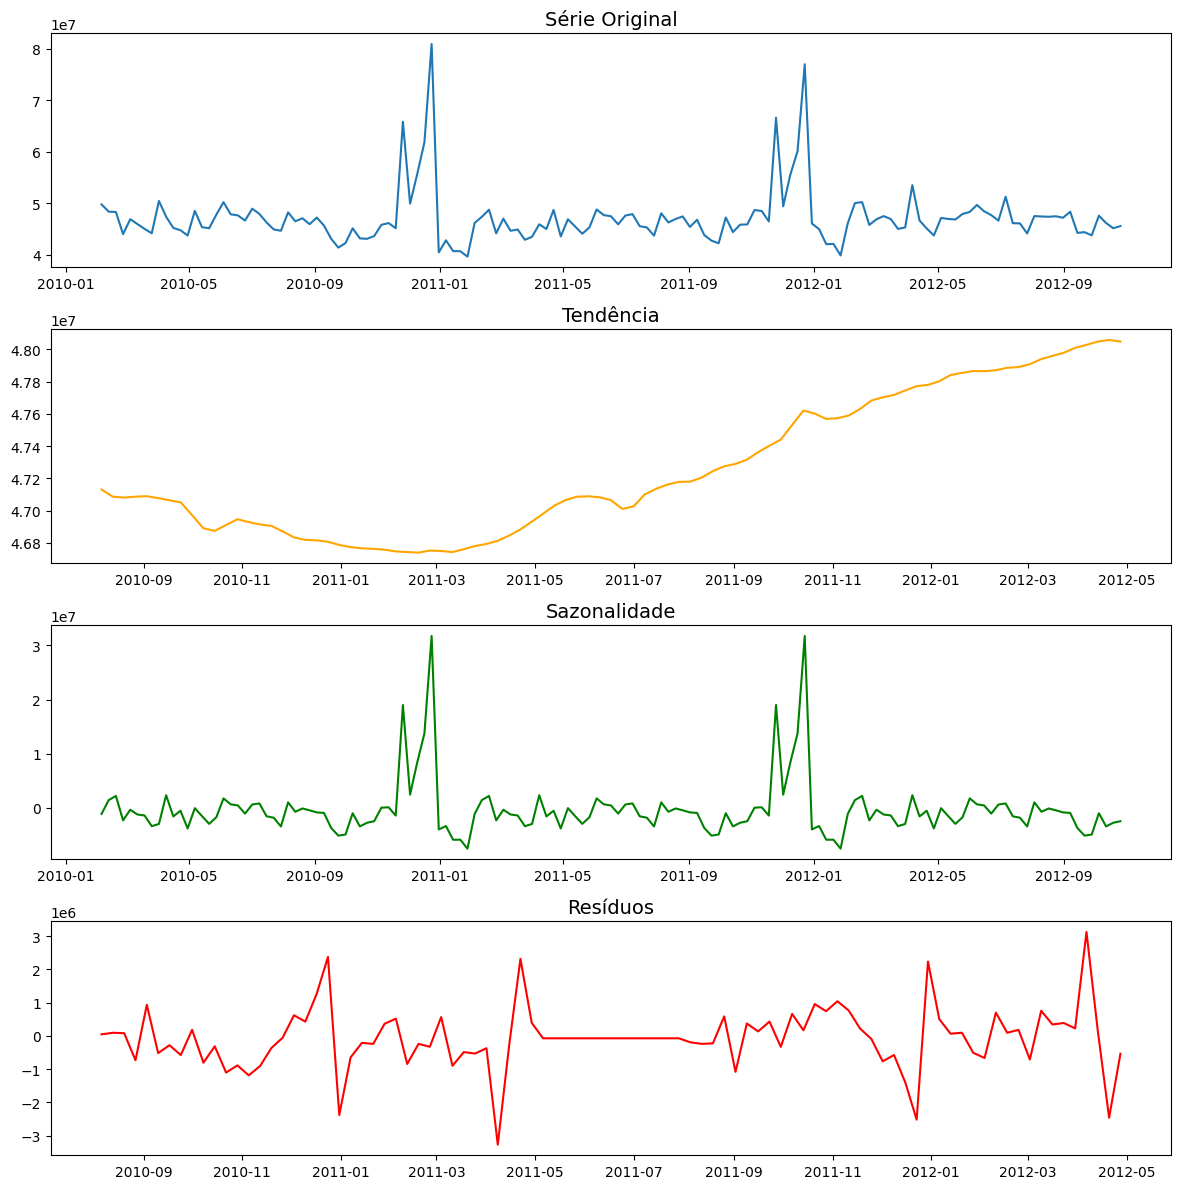

In [ ]:
decomposicao = seasonal_decompose(train_modificado['Weekly_Sales'], model='additive', period=52)

# Criando uma figura com subplots
plt.figure(figsize=(12, 12))

# Série original
plt.subplot(4, 1, 1)
plt.plot(train_modificado['Date'], train_modificado['Weekly_Sales'], label='Série Original')
plt.title('Série Original', fontsize=14)

# Tendência
plt.subplot(4, 1, 2)
plt.plot(train_modificado['Date'], decomposicao.trend, label='Tendência', color='orange')
plt.title('Tendência', fontsize=14)

# Sazonalidade
plt.subplot(4, 1, 3)
plt.plot(train_modificado['Date'], decomposicao.seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade', fontsize=14)

# Resíduos
plt.subplot(4, 1, 4)
plt.plot(train_modificado['Date'], decomposicao.resid, label='Resíduos', color='red')
plt.title('Resíduos', fontsize=14)

plt.tight_layout()
plt.show()

##### Analisar a estacionariedade da série  


O teste ADF (Augmented Dickey-Fuller) verifica a presença de uma raiz unitária.
O p-valor do teste indica se podemos rejeitar a hipótese nula de que a série possui uma raiz unitária (ou seja, não é estacionária).

*Interpretação do p-valor:*  
- **Hipótese nula ($H_0$)**: A série não é estacionária (possui uma raiz unitária).  

- **Hipótese alternativa ($H_1$)**: A série é estacionária (não possui uma raiz unitária).  


*Regras de decisão:*  
- Se o p-valor é menor que o nível de significância &alpha; (geralmente 0,05 ou 0,01):  
  - Rejeitamos $H_0$, e a **série é estacionária**.  

- Se o p-valor é maior ou igual ao nível de significância:  
  - Não podemos rejeitar $H_0$, e a **série não é estacionária**.

In [ ]:
estacionariedade = adfuller(train_modificado['Weekly_Sales'])
print('p-value: %f' % estacionariedade[1])

p-value: 0.000000


Como o p-valor é **MENOR** que 0.05, então rejeitamos $H_0$, isto é, podemos considerar a série estacionária.

---

<br>



##### Autocorrelação (ACF) e Autocorrelação Parcial (PACF)  

Ao analisar Autocorrelação (ACF) e Autocorrelação Parcial (PACF) em uma série temporal, estamos procurando entender como os valores da série em diferentes momentos no tempo estão correlacionados com os valores anteriores (lags). Isso é crucial para identificar padrões de dependência temporal que ajudam na modelagem de séries temporais, especialmente ao trabalhar com modelos como ARIMA.  

<br>

---

<br>


**1. Autocorrelação (ACF)**  
- **O que é?**  
  - A autocorrelação mede o grau de semelhança entre a série temporal em um momento $t$ e em momentos passados ($t-k$), onde $k$ é o lag.  
  - Ela avalia a dependência linear entre os valores da série em diferentes lags.  

- **Por que é importante?**  
  - Identifica se os valores futuros têm uma relação direta com os valores passados.
  - Ajuda a detectar padrões sazonais ou cíclicos, como picos ou repetições em intervalos fixos.  

- **Como interpretar o gráfico de ACF?**  
  - Lags significativos: Lags onde a autocorrelação excede os limites de confiança indicam relação estatística significativa.
  - Decaimento lento: Indica que a série não é estacionária.
  - Padrão sazonal: Repetições regulares nos lags sugerem sazonalidade.  

<br>

---

<br>

**2. Partial Autocorrelation (PACF)**  

- **O que é?**
  - A partial autocorrelation mede a correlação entre a série em $t$ e $t-k$, removendo os efeitos intermediários dos lags entre eles ($t-1, t-2, ..., t-(k-1)).$
  - Ela mostra a relação "direta" entre um lag específico e os valores atuais.  

- **Por que é importante?**
  - Determina quais lags têm impacto direto na série, sem interferência de outros lags.  
  - Usado para identificar a ordem do modelo AR (AutoRegressive).  

- **Como interpretar o gráfico de PACF?**  
  - Lags significativos: Um ou mais lags podem mostrar correlação direta com os valores presentes.  
  - Corte abrupto: Sugere que somente os primeiros lags são relevantes (útil para identificar a ordem $p$ de um modelo AR).  

  <br>

  ---

  <br>

**O que estamos procurando nos gráficos?**  

- Sazonalidade ou padrão repetitivo:
  - Picos regulares no gráfico ACF sugerem sazonalidade.  

- Estacionaridade:  
  - Se as autocorrelações decaem rapidamente para zero no ACF, a série é provavelmente estacionária.  
  - Caso contrário, pode ser necessário transformar a série (e.g., diferenciação).  

- Ordem do modelo ARIMA:  
  - **AR (Autoregressive)**: A ordem $p$ é o número de lags significativos no PACF.   
  - **MA (Moving Average)**: A ordem $q$ é o número de lags significativos no ACF após a diferenciação.


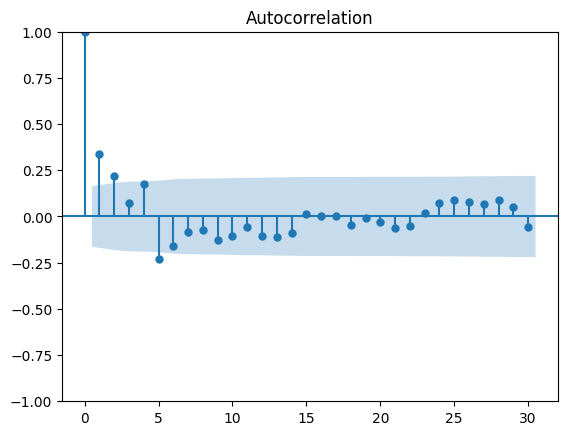

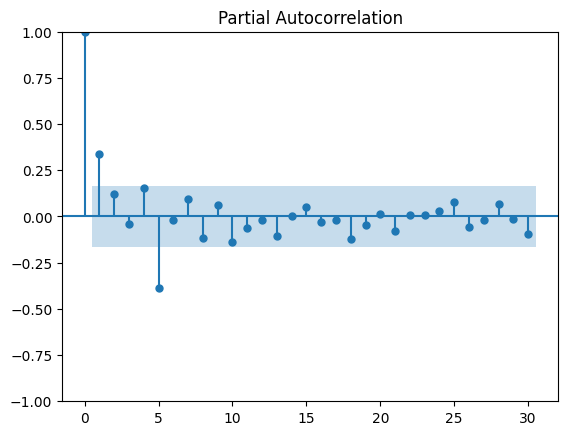

In [ ]:
plot_acf(train_modificado['Weekly_Sales'], lags=30)
plot_pacf(train_modificado['Weekly_Sales'], lags=30)
plt.show()


---

<br>

#### Funções auxiliares



##### Métricas de Ajuste

In [ ]:
def metricas_de_ajuste(modelo, val_real, val_pred):
    mae = mean_absolute_error(val_real, val_pred)
    mse = mean_squared_error(val_real, val_pred)
    rmse = np.sqrt(mean_squared_error(val_real, val_pred))
    mape = (np.mean(np.abs((val_real - val_pred) / val_real)) * 100)

    # Data e hora da execução
    now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Conteúdo a ser salvo no arquivo
    conteudo = (
        f"Data/Hora: {now}\n"
        f"Modelo: {modelo}\n"
        f"MAE: {mae:.2f}\n"
        f"MSE: {mse:.2f}\n"
        f"RMSE: {rmse:.2f}\n"
        f"MAPE: {mape:.2f}\n"
        "-----------------------------\n"
    )

    # Exibir os resultados no console
    print(conteudo)

    # Gravar os resultados em um arquivo .txt
    with open("metricas_ajuste.txt", "a") as arquivo:  # Modo 'a' para anexar ao arquivo
        arquivo.write(conteudo)



#### Dividir o dataset em treino e validação

In [ ]:
df_treino = train_modificado.iloc[:int(0.8*len(train_modificado))]
df_val = train_modificado.iloc[int(0.8*len(train_modificado)):].copy()

---

#### Modelo ARIMA (5,0,5)

##### Criar o modelo e treinar

In [ ]:
modelo_arima_505 = ARIMA(df_treino['Weekly_Sales'], order=(5, 0, 5))
modelo_arima_505 = modelo_arima_505.fit()
modelo_arima_505.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -1918.871
Date:                Mon, 27 Jan 2025   AIC                           3861.743
Time:                        22:05:04   BIC                           3894.577
Sample:                             0   HQIC                          3875.068
                                - 114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.722e+07   7.08e+05     66.691      0.000    4.58e+07    4.86e+07
ar.L1          0.9040      0.358      2.524      0.012       0.202       1.606
ar.L2          0.0244      0.294      0.083      0.934      -0.552       0.600
ar.L3         -0.1097      0.324     -0.339      0.735      -0.745       0.525
ar.L4         -0.1534      0.278     -0.552      0.581      -0.698       0.391
ar.L5          0.1920      0.311      0.617      0.537      -0.418       0.802
ma.L1         -0.5102      0.393     -1.298      0.194      -1.281       0.261
ma.L2         -0.1892      0.206     -0.920      0.357      -0.592       0.214
ma.L3         -0.1352      0.269     -0.503      0.615      -0.662       0.391
ma.L4          0.5694      0.346      1.647      0.099      -0.108       1.247
ma.L5         -0.7130      0.344     -2.071      0.038      -1.388      -0.038
sigma2      2.908e+13      0.002   1.17e+16      0.000    2.91e+13    2.91e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               215.62
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.83   Skew:                             1.96
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+40. Standard errors may be unstable.
"""

##### Análise do modelo

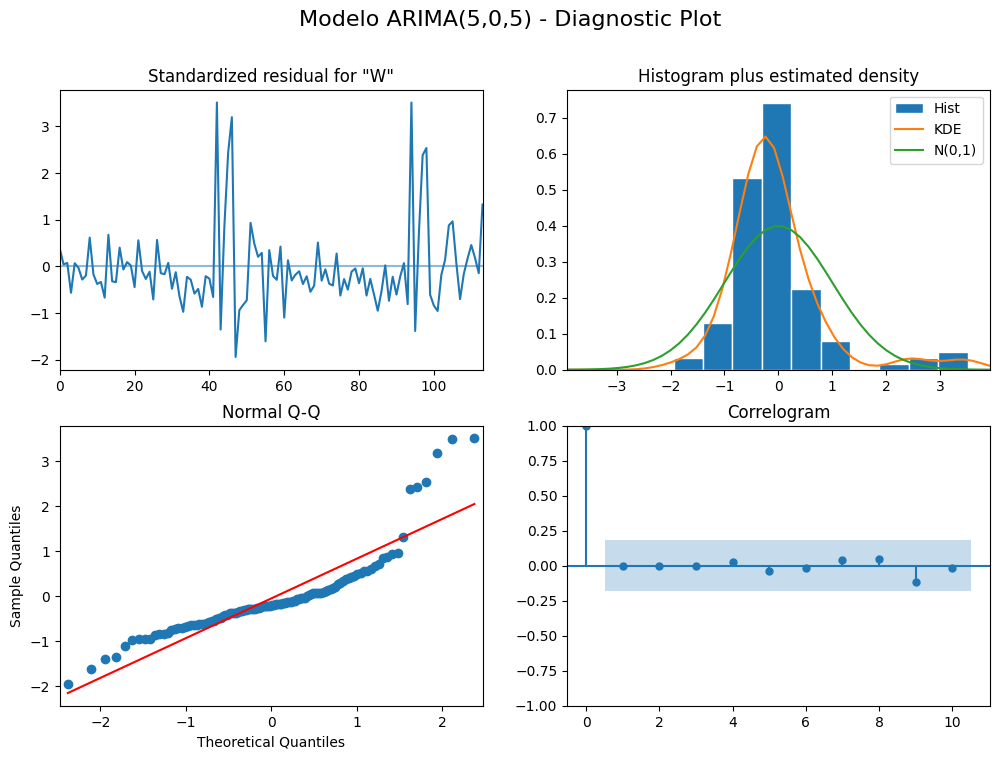

In [ ]:
diag_plot_505 = modelo_arima_505.plot_diagnostics(figsize=(12, 8))
diag_plot_505.suptitle('Modelo ARIMA(5,0,5) - Diagnostic Plot', fontsize=16)
plt.show()

##### Previsão

In [ ]:
forecast = modelo_arima_505.predict(
    start=df_val.index[0],  # Primeiro índice do conjunto de validação
    end=df_val.index[-1]    # Último índice do conjunto de validação
)

df_val_modelo_arima_505 = df_val.copy()
df_val_modelo_arima_505.loc[:, 'Forecast'] = forecast

##### Visualizar resultados

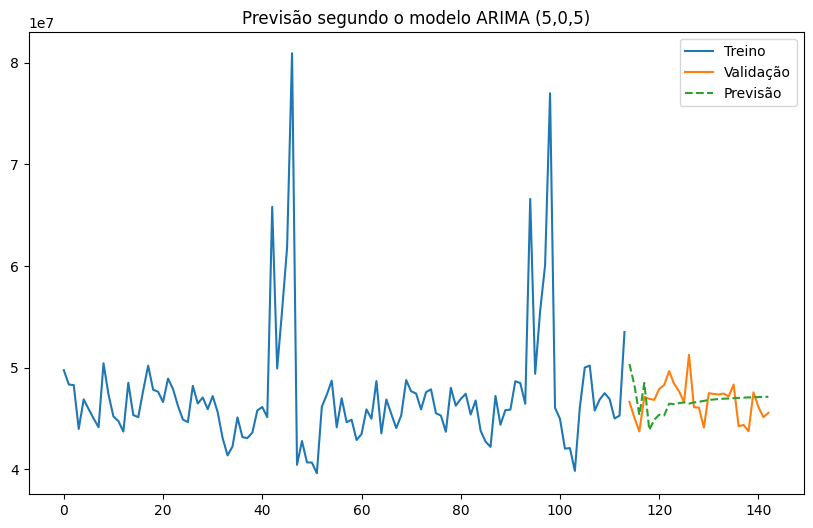

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_treino.index, df_treino['Weekly_Sales'], label='Treino')
plt.plot(df_val_modelo_arima_505.index, df_val_modelo_arima_505['Weekly_Sales'],
         label='Validação')
plt.plot(df_val_modelo_arima_505.index, df_val_modelo_arima_505['Forecast'],
         label='Previsão', linestyle = '--')
plt.title('Previsão segundo o modelo ARIMA (5,0,5)')
plt.legend()
plt.show()

##### Métricas de ajuste do modelo

In [ ]:
metricas_de_ajuste('ARIMA (5,0,5)', df_val_modelo_arima_505['Weekly_Sales'],
                   df_val_modelo_arima_505['Forecast'])

Data/Hora: 2025-01-27 22:05:05
Modelo: ARIMA (5,0,5)
MAE: 1823035.46
MSE: 4830373834662.80
RMSE: 2197811.15
MAPE: 3.91
-----------------------------



---

#### Modelo ARIMA (5,1,5)

##### Criar o modelo e treinar

In [ ]:
modelo_arima_515 = ARIMA(df_treino['Weekly_Sales'], order=(5, 1, 5))
modelo_arima_515 = modelo_arima_515.fit()
modelo_arima_515.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1918.150
Date:                Mon, 27 Jan 2025   AIC                           3858.300
Time:                        22:05:06   BIC                           3888.301
Sample:                             0   HQIC                          3870.474
                                - 114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5524      0.489     -1.130      0.258      -1.511       0.406
ar.L2         -0.6331      0.227     -2.795      0.005      -1.077      -0.189
ar.L3         -0.3682      0.223     -1.652      0.099      -0.805       0.069
ar.L4          0.2022      0.248      0.816      0.415      -0.284       0.688
ar.L5          0.1903      0.352      0.541      0.589      -0.500       0.880
ma.L1          0.0938      0.489      0.192      0.848      -0.864       1.051
ma.L2          0.2545      0.271      0.938      0.348      -0.277       0.786
ma.L3         -0.2070      0.195     -1.063      0.288      -0.589       0.175
ma.L4         -0.4891      0.226     -2.160      0.031      -0.933      -0.045
ma.L5         -0.5426      0.369     -1.470      0.142      -1.266       0.181
sigma2      3.265e+13   4.39e-14   7.44e+26      0.000    3.26e+13    3.26e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):               100.94
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.63
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.81e+42. Standard errors may be unstable.
"""

##### Análise do modelo

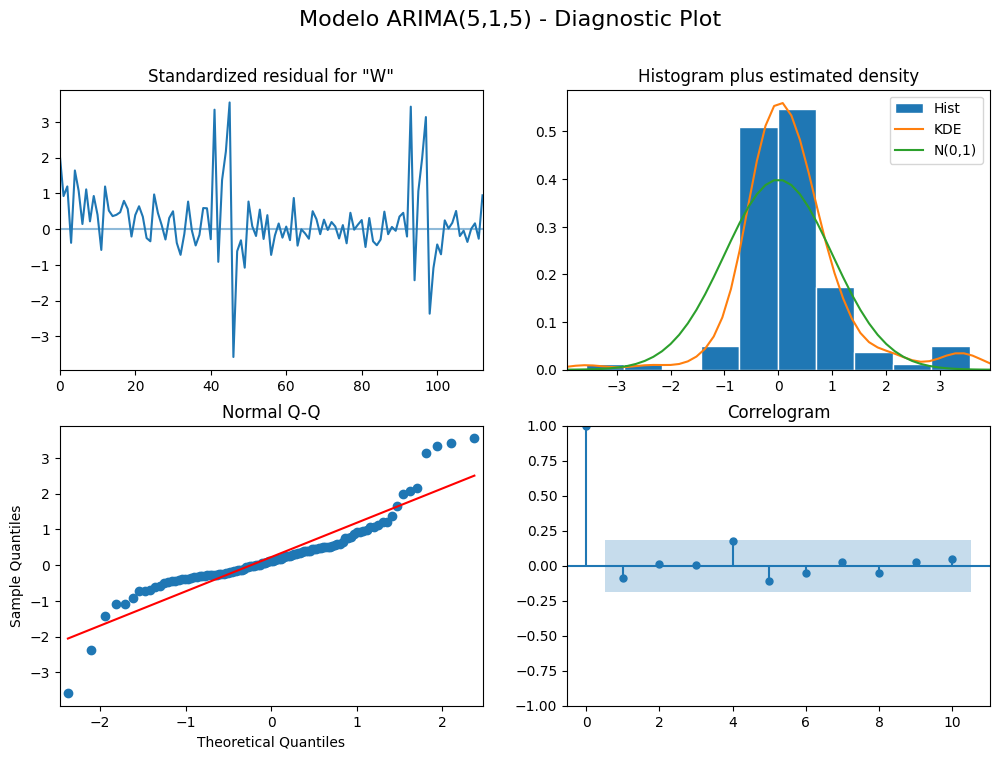

In [ ]:
diag_plot_515 = modelo_arima_515.plot_diagnostics(figsize=(12, 8))
diag_plot_515.suptitle('Modelo ARIMA(5,1,5) - Diagnostic Plot', fontsize=16)
plt.show()

##### Previsão

In [ ]:
forecast = modelo_arima_515.predict(
    start=df_val.index[0],  # Primeiro índice do conjunto de validação
    end=df_val.index[-1]    # Último índice do conjunto de validação
)

df_val_modelo_arima_515 = df_val.copy()
df_val_modelo_arima_515.loc[:, 'Forecast'] = forecast

##### Visualizar resultados

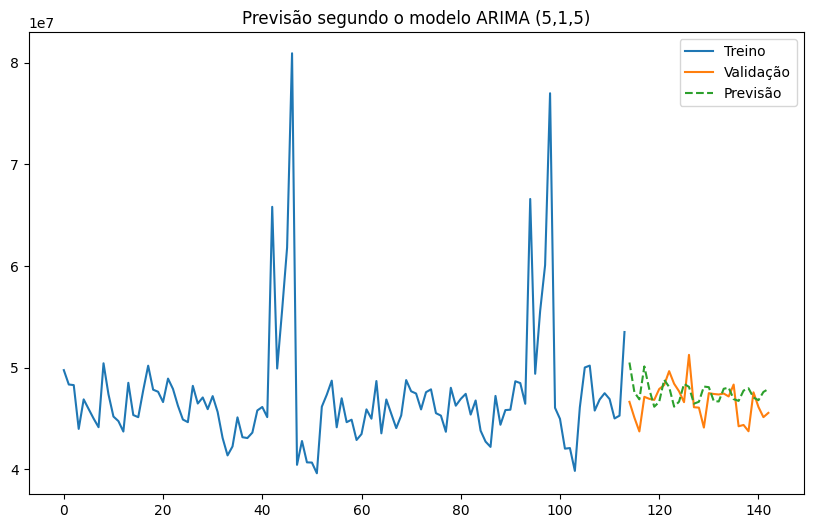

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_treino.index, df_treino['Weekly_Sales'], label='Treino')
plt.plot(df_val_modelo_arima_515.index, df_val_modelo_arima_515['Weekly_Sales'],
         label='Validação')
plt.plot(df_val_modelo_arima_515.index, df_val_modelo_arima_515['Forecast'],
         label='Previsão', linestyle = '--')
plt.title('Previsão segundo o modelo ARIMA (5,1,5)')
plt.legend()
plt.show()

##### Métricas de ajuste do modelo

In [ ]:
metricas_de_ajuste('ARIMA (5,1,5)', df_val_modelo_arima_515['Weekly_Sales'],
                   df_val_modelo_arima_515['Forecast'])

Data/Hora: 2025-01-27 22:05:07
Modelo: ARIMA (5,1,5)
MAE: 1776843.04
MSE: 4624319312864.23
RMSE: 2150423.05
MAPE: 3.85
-----------------------------



---

<br>

#### Modelo Auto-ARIMA

##### Criar o modelo e treinar

In [ ]:
modelo_autoarima = auto_arima(
    df_treino['Weekly_Sales'],
    max_p=6,
    max_q=6,
    max_d=2,
    seasonal=False,
    trace=True,
    error_action='ignore',
    supress_warnings=True,
    stepwise=False,
    n_jobs=-1
)

modelo_autoarima.summary()


Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 6.454 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -1935.174
Date:                Mon, 27 Jan 2025   AIC                           3882.347
Time:                        22:05:13   BIC                           3898.764
Sample:                             0   HQIC                          3889.010
                                - 114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2713      0.134      2.028      0.043       0.009       0.533
ar.L2          0.7287      0.134      5.450      0.000       0.467       0.991
ma.L1          0.2363      0.153      1.543      0.123      -0.064       0.537
ma.L2         -0.6029      0.103     -5.855      0.000      -0.805      -0.401
ma.L3         -0.5996      0.082     -7.271      0.000      -0.761      -0.438
sigma2      3.967e+13   2.77e-15   1.43e+28      0.000    3.97e+13    3.97e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):               191.63
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               7.15   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.95e+43. Standard errors may be unstable.
"""

##### Análise do modelo

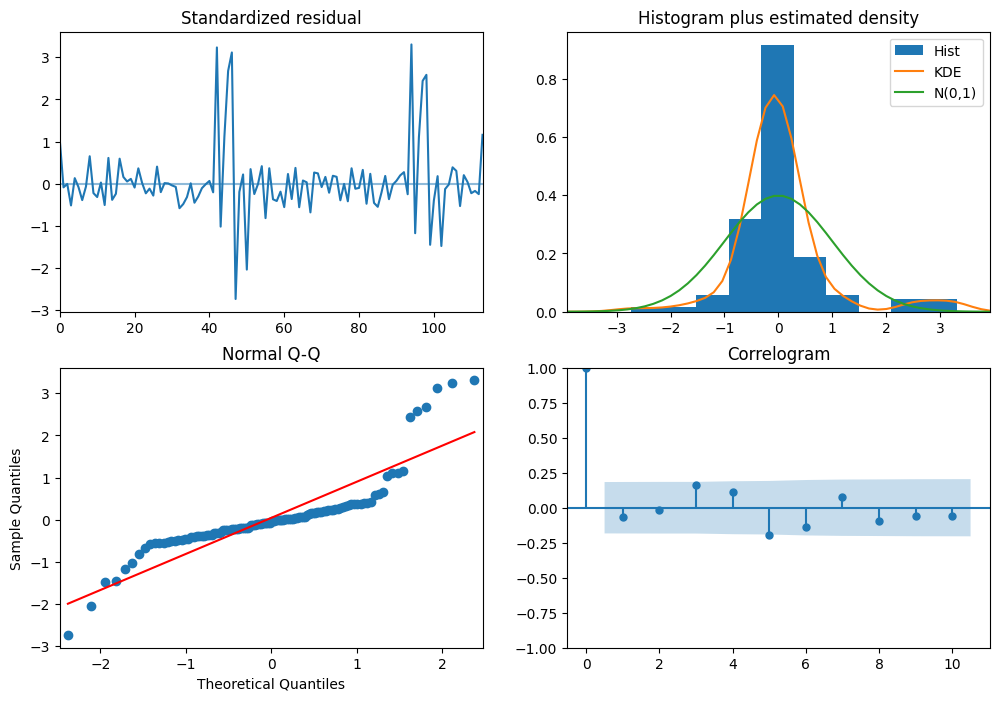

In [ ]:
modelo_autoarima.plot_diagnostics(figsize=(12, 8))
plt.show()

##### Previsão

In [ ]:
forecast = modelo_autoarima.predict(
    start=df_val.index[0],  # Primeiro índice do conjunto de validação
    end=df_val.index[-1]    # Último índice do conjunto de validação
)

df_val_modelo_autoarima = df_val.copy()
df_val_modelo_autoarima.loc[:, 'Forecast'] = forecast

##### Visualizar resultados

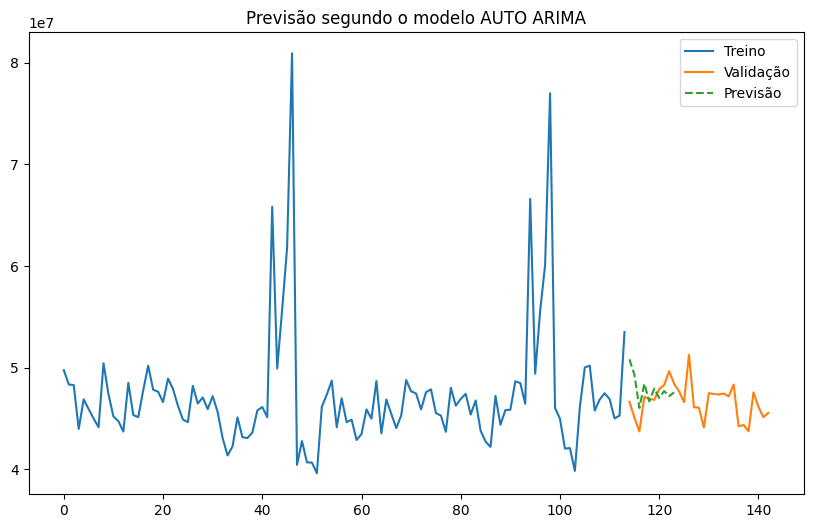

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_treino.index, df_treino['Weekly_Sales'], label='Treino')
plt.plot(df_val_modelo_autoarima.index, df_val_modelo_autoarima['Weekly_Sales'],
         label='Validação')
plt.plot(df_val_modelo_autoarima.index, df_val_modelo_autoarima['Forecast'],
         label='Previsão', linestyle = '--')
plt.title('Previsão segundo o modelo AUTO ARIMA')
plt.legend()
plt.show()

In [ ]:
#metricas_de_ajuste('AUTO-ARIMA', df_val['Weekly_Sales'], df_val['Forecast'])

KeyError: 'Forecast'

---

<br>

#### Modelo de Suavização Exponencial Simples (SES)

##### Criar o modelo e treinar

In [ ]:
modelo_SES = SimpleExpSmoothing(df_treino['Weekly_Sales'])
modelo_SES = modelo_SES.fit()
modelo_SES.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Weekly_Sales,No. Observations:,114
Model:,SimpleExpSmoothing,SSE,4141825686960910.000
Optimized:,True,AIC,3563.503
Trend:,None,BIC,3568.976
Seasonal:,None,AICC,3563.870
Seasonal Periods:,None,Date:,"Mon, 27 Jan 2025"
Box-Cox:,False,Time:,22:05:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3733721,alpha,True
initial_level,4.9751e+07,l.0,False


##### Previsão

In [ ]:
forecast = modelo_SES.predict(
    start=df_val.index[0],  # Primeiro índice do conjunto de validação
    end=df_val.index[-1]    # Último índice do conjunto de validação
)

df_val_modelo_SES = df_val.copy()
df_val_modelo_SES.loc[:, 'Forecast'] = forecast

##### Visualizar resultados

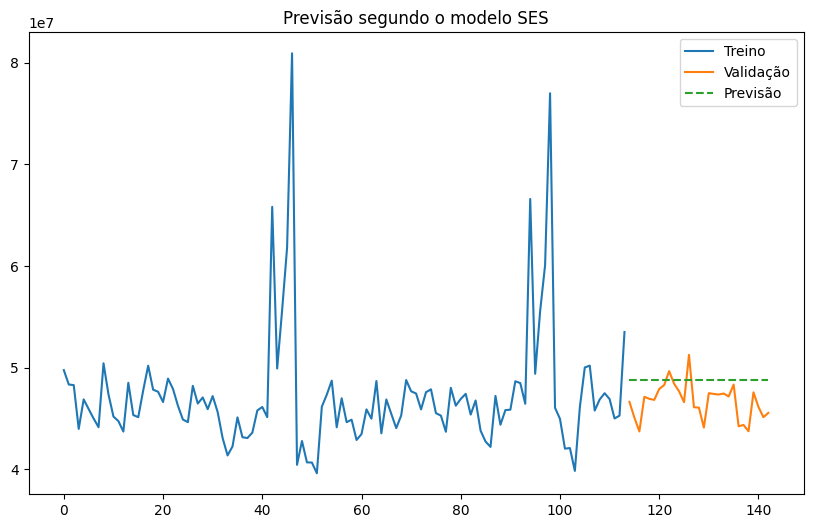

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_treino.index, df_treino['Weekly_Sales'], label='Treino')
plt.plot(df_val_modelo_SES.index, df_val_modelo_SES['Weekly_Sales'],
         label='Validação')
plt.plot(df_val_modelo_SES.index, df_val_modelo_SES['Forecast'],
         label='Previsão', linestyle = '--')
plt.title('Previsão segundo o modelo SES')
plt.legend()
plt.show()

##### Métricas de ajuste do modelo

In [ ]:
metricas_de_ajuste('SES', df_val_modelo_SES['Weekly_Sales'],
                   df_val_modelo_SES['Forecast'])

Data/Hora: 2025-01-27 22:05:34
Modelo: SES
MAE: 2291844.47
MSE: 7228615283568.49
RMSE: 2688608.43
MAPE: 5.01
-----------------------------



---

<br>

#### Modelo de Holt-Winters

##### Criar o modelo e treinar

In [ ]:
modelo_holt_winters = ExponentialSmoothing(df_treino['Weekly_Sales'],
                                           trend= None,
                                           seasonal= 'add',
                                           seasonal_periods=52)
modelo_holt_winters = modelo_holt_winters.fit()
modelo_holt_winters.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Weekly_Sales,No. Observations:,114
Model:,ExponentialSmoothing,SSE,234270886555103.875
Optimized:,True,AIC,3340.048
Trend:,None,BIC,3487.803
Seasonal:,Additive,AICC,3452.048
Seasonal Periods:,52,Date:,"Mon, 27 Jan 2025"
Box-Cox:,False,Time:,22:05:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0992857,alpha,True
smoothing_seasonal,0.0001,gamma,True


##### Previsão

In [ ]:
forecast = modelo_holt_winters.predict(
    start=df_val.index[0],  # Primeiro índice do conjunto de validação
    end=df_val.index[-1]    # Último índice do conjunto de validação
)

df_val_modelo_holt_winters = df_val.copy()
df_val_modelo_holt_winters.loc[:, 'Forecast'] = forecast

##### Visualizar resultados

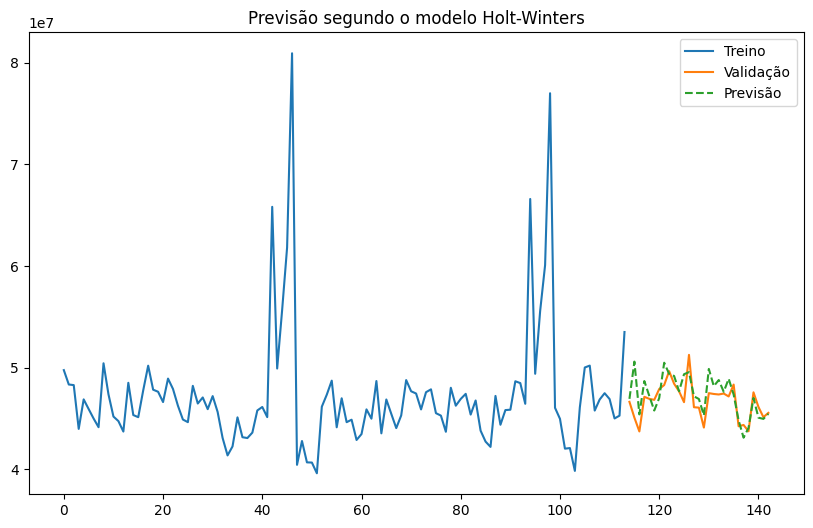

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_treino.index, df_treino['Weekly_Sales'], label='Treino')
plt.plot(df_val_modelo_holt_winters.index, df_val_modelo_holt_winters['Weekly_Sales'],
         label='Validação')
plt.plot(df_val_modelo_holt_winters.index, df_val_modelo_holt_winters['Forecast'],
         label='Previsão', linestyle = '--')
plt.title('Previsão segundo o modelo Holt-Winters')
plt.legend()
plt.show()

##### Métricas de ajuste do modelo

In [ ]:
metricas_de_ajuste('Holt-Winters', df_val_modelo_holt_winters['Weekly_Sales'],
                   df_val_modelo_holt_winters['Forecast'])

Data/Hora: 2025-01-27 22:05:35
Modelo: Holt-Winters
MAE: 1158055.01
MSE: 2509331616379.43
RMSE: 1584087.00
MAPE: 2.49
-----------------------------



---

<br>

